## Hierarchical clustering
Hierarchical clustering is another popular method for clustering. The goal of this chapter is to go over how it works, how to use it, and how it compares to k-means clustering.

### Hierarchical clustering with results
In this exercise, you will create your first hierarchical clustering model using the hclust() function.

We have created some data that has two dimensions and placed it in a variable called x. Your task is to create a hierarchical clustering model of x. Remember from the video that the first step to hierarchical clustering is determining the similarity between observations, which you will do with the dist() function.

You will look at the structure of the resulting model using the summary() function.

In [1]:
# define x (a random 2*100 array)
x = replicate(2, rnorm(100))

# Create hierarchical clustering model: hclust.out
hclust.out <- hclust(dist(x))

# Inspect the result
summary(hclust.out)

            Length Class  Mode     
merge       198    -none- numeric  
height       99    -none- numeric  
order       100    -none- numeric  
labels        0    -none- NULL     
method        1    -none- character
call          2    -none- call     
dist.method   1    -none- character

### Cutting the tree
Remember from the video that cutree() is the R function that cuts a hierarchical model. The h and k arguments to cutree() allow you to cut the tree based on a certain height h or a certain number of clusters k.

In this exercise, you will use cutree() to cut the hierarchical model you created earlier based on each of these two criteria.

In [2]:
# Cut by height
cutree(hclust.out, h = 7)

# Cut by number of clusters
cutree(hclust.out, k = 3)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

[1] 1 1 2 3 1 1 2 3 2 3 2 3 3 1 2 1 3 1 2 2 3 1 3 2 1 1 1 3 1 3 3 2 1 2 1 1 3
 [38] 1 1 3 3 2 2 1 2 3 3 1 2 1 1 3 1 1 3 1 3 3 1 3 3 3 3 1 3 1 3 2 3 1 3 3 2 2
 [75] 2 1 1 1 1 3 2 3 1 3 3 1 1 2 1 1 3 1 2 3 1 1 2 1 2 2

### Linkage methods
In this exercise, you will produce hierarchical clustering models using different linkages and plot the dendrogram for each, observing the overall structure of the trees.

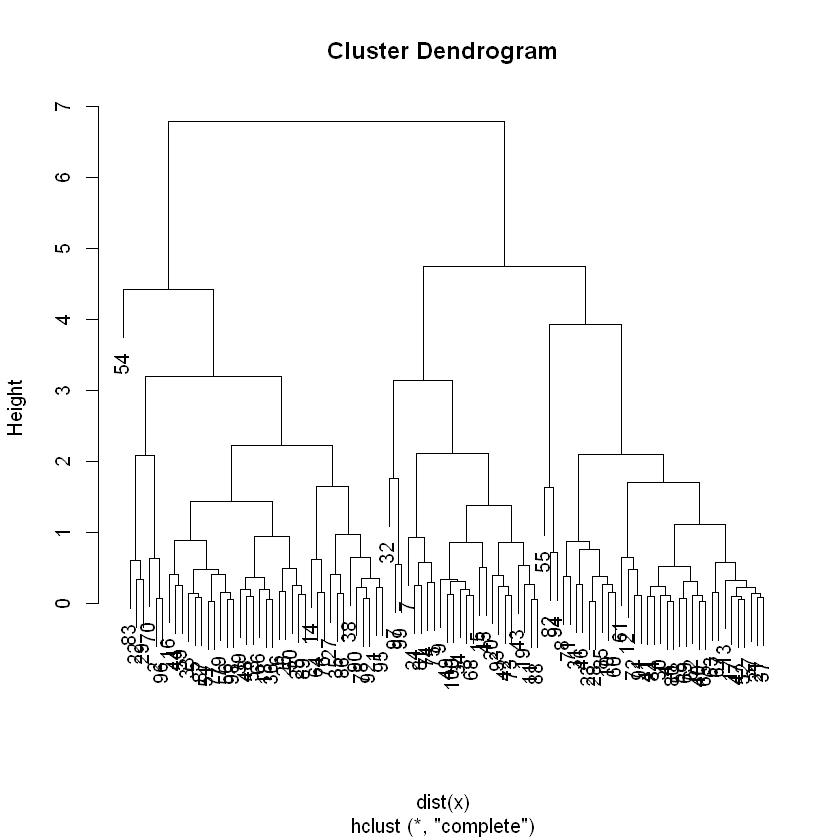

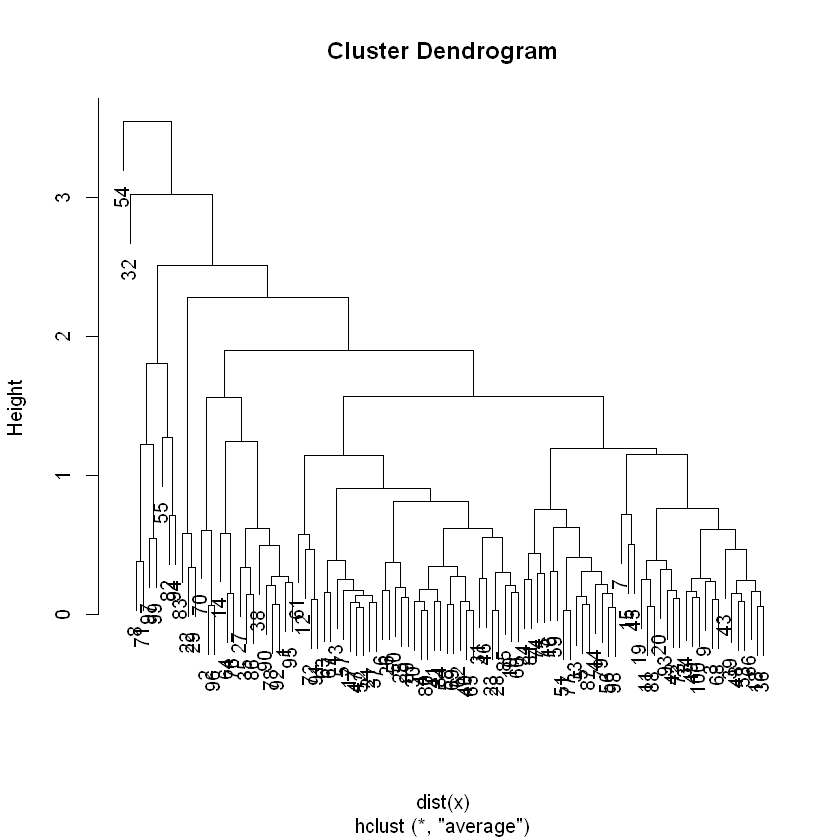

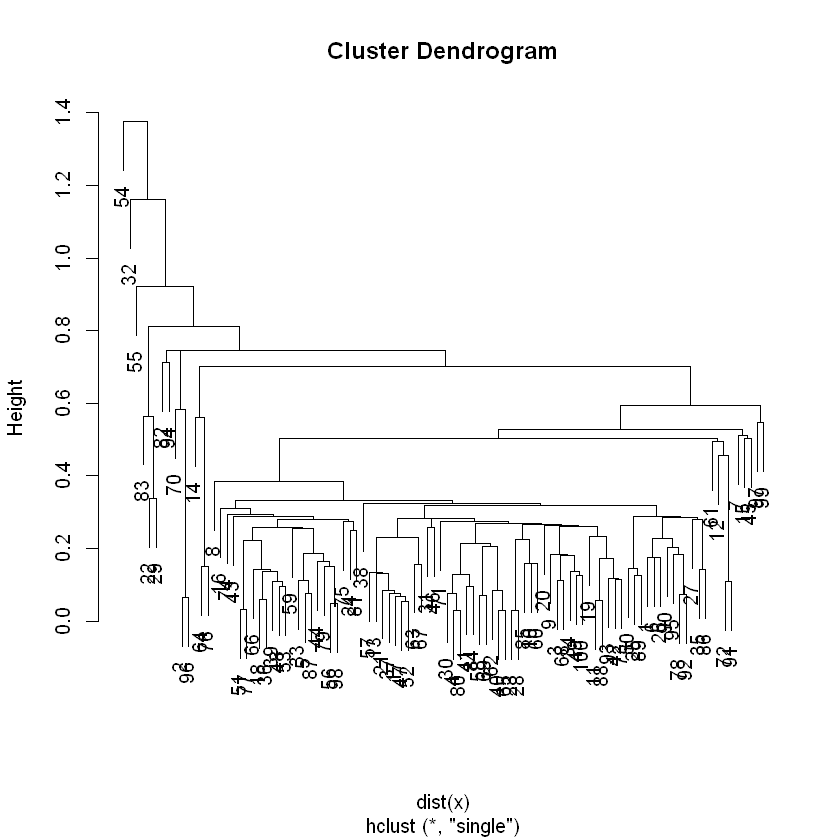

In [4]:
# Cluster using complete linkage: hclust.complete
hclust.complete <- hclust(dist(x), method = "complete")

# Cluster using average linkage: hclust.average
hclust.average <-  hclust(dist(x), method = "average")


# Cluster using single linkage: hclust.single
hclust.single <-  hclust(dist(x), method = "single")

# Plot dendrogram of hclust.complete
plot(hclust.complete)

# Plot dendrogram of hclust.average
plot(hclust.average)

# Plot dendrogram of hclust.single
plot(hclust.single)

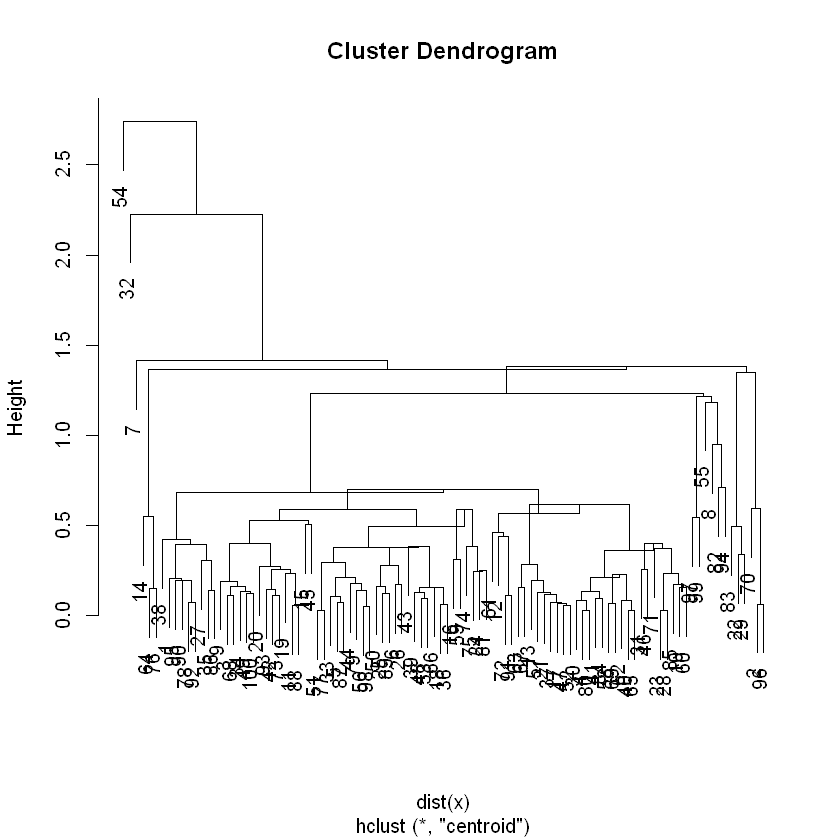

In [5]:
# check why centroid method is not recommended
hclust.centroid <-  hclust(dist(x), method = "centroid")
plot(hclust.centroid)


Whether you want balanced or unbalanced trees for your hierarchical clustering model depends on the context of the problem you're trying to solve. Balanced trees are essential if you want an even number of observations assigned to each cluster. On the other hand, if you want to detect outliers, for example, an unbalanced tree is more desirable because pruning an unbalanced tree can result in most observations assigned to one cluster and only a few observations assigned to other clusters.

### Practical matters: scaling
Recall from the video that clustering real data may require scaling the features if they have different distributions. So far in this chapter, you have been working with synthetic data that did not need scaling.

In this exercise, you will go back to working with "real" data, the pokemon dataset introduced in the first chapter. You will observe the distribution (mean and standard deviation) of each feature, scale the data accordingly, then produce a hierarchical clustering model using the complete linkage method.

HitPoints         Attack        Defense  SpecialAttack SpecialDefense 
      69.25875       79.00125       73.84250       72.82000       71.90250 
         Speed 
      68.27750

HitPoints         Attack        Defense  SpecialAttack SpecialDefense 
      25.53467       32.45737       31.18350       32.72229       27.82892 
         Speed 
      29.06047

[1] "must be 0"


HitPoints         Attack        Defense  SpecialAttack SpecialDefense 
 -2.517214e-16   3.446896e-17  -3.948231e-17   2.097498e-16  -1.274306e-16 
         Speed 
 -1.102547e-16

[1] "must be 1"


HitPoints         Attack        Defense  SpecialAttack SpecialDefense 
             1              1              1              1              1 
         Speed 
             1

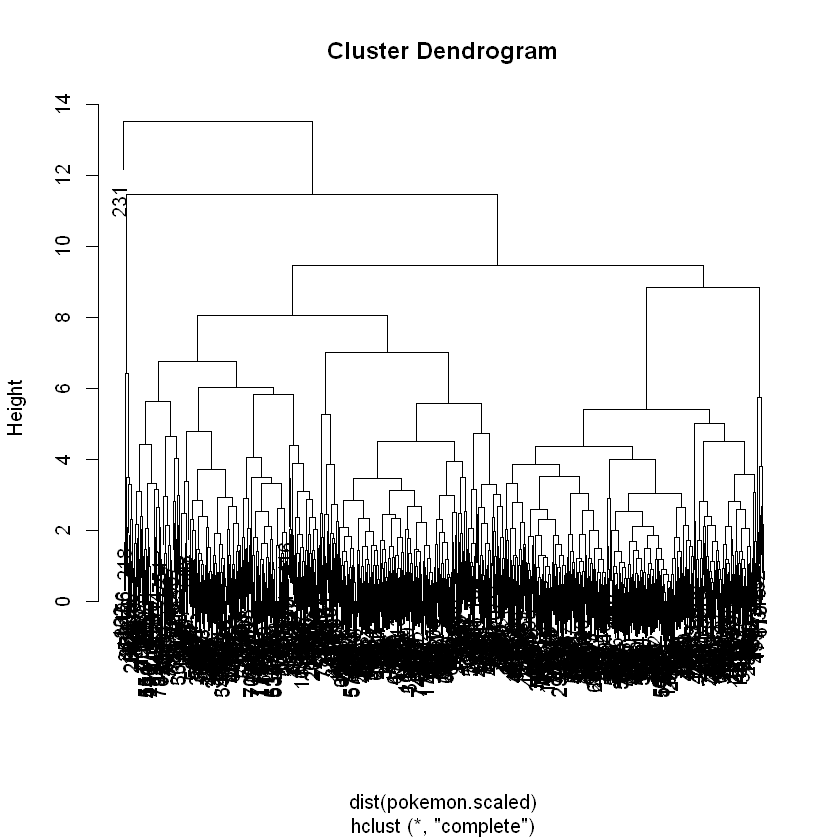

In [8]:
3

# View column means
colMeans(pokemonToAnalysis)

# View column standard deviations
apply(pokemonToAnalysis, 2, sd)

# Scale the data
pokemon.scaled = scale(pokemonToAnalysis)

# check scaled data
print("must be 0")
colMeans(pokemon.scaled) # must be 0 
print("must be 1")
apply(pokemon.scaled, 2, sd) # must be 1


# Create hierarchical clustering model: hclust.pokemon
hclust.pokemon = hclust(dist(pokemon.scaled), method = "complete")

plot(hclust.pokemon)

### Comparing kmeans() and hclust()
Comparing k-means and hierarchical clustering, you'll see the two methods produce different cluster memberships. This is because the two algorithms make different assumptions about how the data is generated. In a more advanced course, we could choose to use one model over another based on the quality of the models' assumptions, but for now, it's enough to observe that they are different.

This exercise will have you compare results from the two models on the pokemon dataset to see how they differ.

In [10]:
# Build model with k clusters: km.out
km.pokemon <- kmeans(pokemonToAnalysis, centers = 3, nstart = 20, iter.max = 50)

# Apply cutree() to hclust.pokemon: cut.pokemon
cut.pokemon = cutree(hclust.pokemon, k = 3)

# Compare methods
table(km.pokemon$cluster, cut.pokemon)

   cut.pokemon
      1   2   3
  1 267   3   0
  2 350   5   0
  3 171   3   1

Looking at the table, it looks like the hierarchical clustering model assigns most of the observations to cluster 1, while the k-means algorithm distributes the observations relatively evenly among all clusters. It's important to note that there's no consensus on which method produces better clusters. The job of the analyst in unsupervised clustering is to observe the cluster assignments and make a judgment call as to which method provides more insights into the data.